### Exercise 4.1
#### Use either R or Python and do the following:

- Try to use the code in the previous lesson (Keras neural network) to test other data sets such as Iris, Wine, Diabetes and other data sets of your choice. 

- You need to compare these results with scikit-learn library and report what the similarities and differences are. You can also compare the computational time of the different libraries as well.

Show performance of different optimisers such as SGD and Adam.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

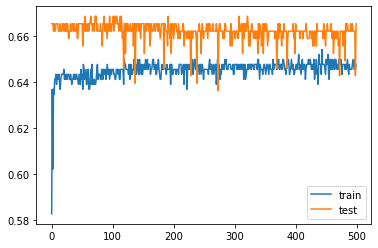

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

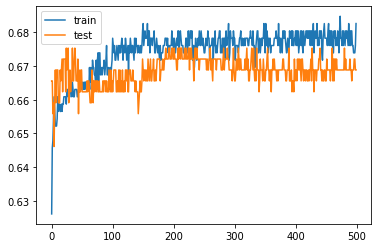

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

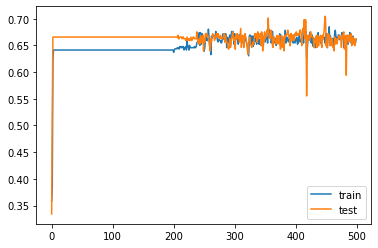

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

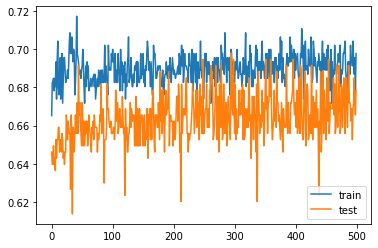

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

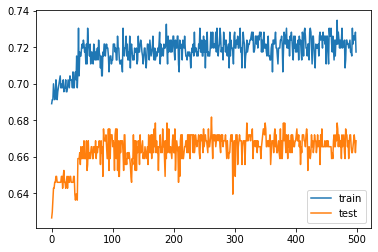

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

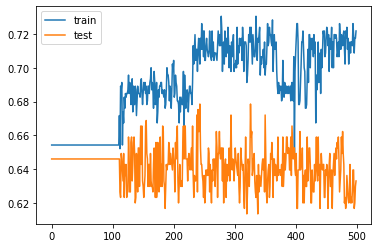

SGD_all: 
 [0.66558444 0.6785714 ] 6 

Mean of SGD_all: 
 0.6720779240131378 6 

Std of SGD_all: 
 0.006493479013442993 6 

Adam_all: 
 [0.66883117 0.66883117] 6 

Mean of Adam_all: 
 0.6688311696052551 6 

Std of Adam_all: 
 0.0 6 

SGD2_all: 
 [0.66233766 0.6331169 ] 6


<Figure size 432x288 with 0 Axes>

In [1]:
import numpy as np 
import random
import matplotlib.pyplot as plt
from numpy import *
from sklearn import datasets 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
# keras 
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import roc_curve, auc


def read_data(run_num):
    # Source: Pima-Indian diabetes dataset: https://www.kaggle.com/kumargh/pimaindiansdiabetescsv
    data = genfromtxt("datasets/pima.csv", delimiter=",")
    data_X = data[:, :8]   # all features 0-7 

    # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html
    # sklearn.preprocessing.Normalizer
    #transformer = Normalizer().fit(data_X)  # fit does nothing
    #data_inputx = transformer.transform(data_X)
    data_y = data[:, -1]    # target - so that last col is selected from data

    X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.40, random_state=run_num)

    return X_train, X_test, y_train, y_test

    
def keras_nn(X_train, X_test, y_train, y_test, type_model, hidden, learn_rate, run_num): 
    # https://keras.io/api/models/model_training_apis/
    # note that keras model on own ensures that every run begins with different initial 
    # weights so run_num is not needed 
    outputs = 1

    if type_model == 0:   # SGD
        #nn = MLPClassifier(hidden_layer_sizes=(hidden,), random_state=run_num,
                           #max_iter=100, solver='sgd', learning_rate_init=learn_rate )
        '''
        model = Sequential()
        model.add(Dense(hidden, input_dim=X_train.shape[1], activation='relu'))
        model.add(Dense(outputs, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
        '''
        # Create the Sequential model
        model = Sequential([
            keras.layers.Dense(hidden, input_dim=X_train.shape[1], activation="relu"),
            keras.layers.Dense(outputs, activation='sigmoid')
        ])

        # Specify the loss function and the optimizer after a model is created
        model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])
    
    elif type_model == 1:   # Adam
        #nn = MLPClassifier(hidden_layer_sizes=(hidden,), random_state=run_num, 
                           #max_iter=100,solver='adam', learning_rate_init=learn_rate)
        '''
        model = Sequential()
        model.add(Dense(hidden, input_dim=X_train.shape[1], activation='sigmoid'))
        model.add(Dense(outputs, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        '''
        # Create the Sequential model
        model = Sequential([
            keras.layers.Dense(hidden, input_dim=X_train.shape[1], activation="sigmoid"),
            keras.layers.Dense(outputs, activation='sigmoid')
        ])

        # Specify the loss function and the optimizer after a model is created
        model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


    elif type_model == 2:   # SGD with 2 hidden layers
        #nn = MLPClassifier(hidden_layer_sizes=(hidden,hidden), random_state=run_num, max_iter=100,
                           #solver='sgd',learning_rate='constant', learning_rate_init=learn_rate)
        #hidden_layer_sizes=(hidden,hidden, hidden) would implement 3 hidden layers
        '''
        model = Sequential()
        model.add(Dense(hidden, input_dim=X_train.shape[1], activation='sigmoid')) 
        model.add(Dense(hidden, activation='sigmoid'))
        model.add(Dense(outputs, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
        '''
        # Create the Sequential model
        model = Sequential([
            keras.layers.Dense(hidden, input_dim=X_train.shape[1], activation="sigmoid"),
            keras.layers.Dense(hidden, activation='sigmoid'),
            keras.layers.Dense(outputs, activation='sigmoid')
        ])

        # Specify the loss function and the optimizer after a model is created
        model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])
    
    else:
        print('no model')
    
    # Fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=10, verbose=0)

    # Evaluate the model
    # https://keras.io/api/models/model_training_apis/
    _, acc_train = model.evaluate(X_train, y_train, verbose=0)
    _, acc_test = model.evaluate(X_test, y_test, verbose=0)
    #print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

    # Plot history
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.legend()
    plt.savefig('figures/'+str(type_model)+'nodp.png')
    plt.show()
    plt.clf()
   
    #auc = roc_auc_score(y_pred, y_test, average=None) 
    return acc_test #,acc_train


def main(): 

    max_expruns = 2

    SGD_all = np.zeros(max_expruns) 
    Adam_all = np.zeros(max_expruns)     
    SGD2_all = np.zeros(max_expruns)  
    
    max_hidden = 8

    learn_rate = 0.01 

    #for learn_rate in range(0.1, 1, 0.2):
    
    for hidden in range(6, max_hidden, 2):    # only cover 6 hidden neurons for now
 
        for run_num in range(0, max_expruns):    
            X_train, X_test, y_train, y_test = read_data(run_num)   
            
            acc_sgd = keras_nn(X_train, X_test, y_train, y_test, 0, hidden, learn_rate, run_num)   # SGD
            acc_adam = keras_nn(X_train, X_test, y_train, y_test, 1, hidden, learn_rate, run_num)  # Adam 
            acc_sgd2 = keras_nn(X_train, X_test, y_train, y_test, 2, hidden, learn_rate, run_num)  # SGD2
           
            SGD_all[run_num] = acc_sgd
            Adam_all[run_num] = acc_adam
            SGD2_all[run_num] = acc_sgd2   # two hidden layers
        
        print('SGD_all: \n', SGD_all, hidden, '\n')
        print('Mean of SGD_all: \n', np.mean(SGD_all), hidden, '\n')
        print('Std of SGD_all: \n', np.std(SGD_all), hidden, '\n')

        print('Adam_all: \n', Adam_all, hidden, '\n')
        print('Mean of Adam_all: \n', np.mean(Adam_all), hidden, '\n')
        print('Std of Adam_all: \n', np.std(Adam_all), hidden, '\n')

        print('SGD2_all: \n', SGD2_all, hidden)

        # you can also print for Adam 
 
    # next try a paragraph to describe your results and discuss which models are better to use
    # repeat for another dataset
    # you can save results to a file as well
    
    
if __name__ == '__main__':
     main() 

In [3]:
data = genfromtxt("datasets/pima.csv", delimiter=",")
data_X = data[:, :8]

In [4]:
data_X[:, :5]

array([[  6., 148.,  72.,  35.,   0.],
       [  1.,  85.,  66.,  29.,   0.],
       [  8., 183.,  64.,   0.,   0.],
       ...,
       [  5., 121.,  72.,  23., 112.],
       [  1., 126.,  60.,   0.,   0.],
       [  1.,  93.,  70.,  31.,   0.]])

In [8]:
data_y = data[:, -1]
type(data_y)

numpy.ndarray

In [6]:
data_X.shape

(768, 8)

In [9]:
data_y.shape

(768,)